In [1]:
import sys

sys.path.append("../handybeam_core_repo")
sys.path.append("../handybeam_visualize_repo")

In [8]:
## Imports

import sys
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import handybeam
import handybeam.world


import handybeam.tx_array_library
import handybeam.tx_array
import handybeam.visualise
import handybeam.samplers.rectilinear_sampler as rect_sampler
from handybeam.solver import Solver

import handybeam_visualize.basic
from handybeam_visualize.basic import visualise_flat_tx_array

In [9]:
world = handybeam.world.World(frequency = 40000, sound_velocity = 343)

In [10]:
world.tx_array = handybeam.tx_array_library.rectilinear(parent = world)

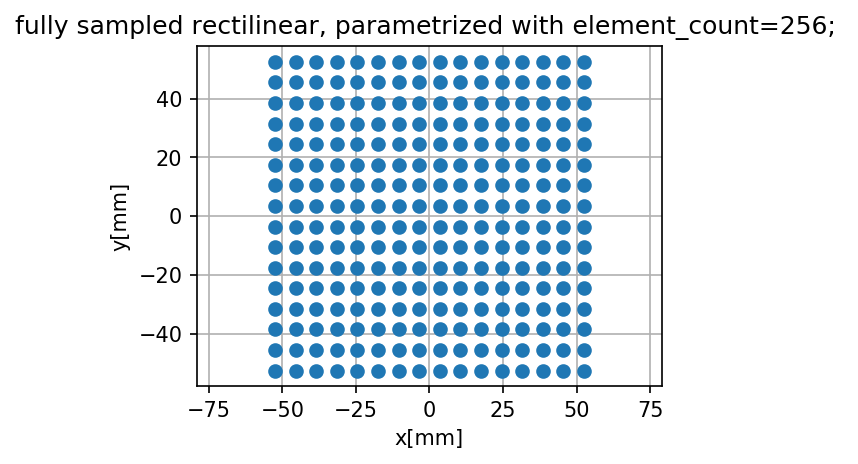

{'hf': <matplotlib.figure.Figure at 0x28864bab208>,
 'ha': <matplotlib.axes._subplots.AxesSubplot at 0x2886e443630>,
 'hp': [<matplotlib.lines.Line2D at 0x288714c6550>]}

In [11]:
visualise_flat_tx_array(world,figsize=[4,3])

Text(0.5,1,'fully sampled rectilinear, parametrized with element_count=256; ')

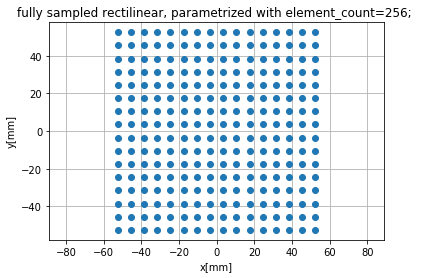

In [12]:
#
hf=plt.figure()
ha=plt.axes()
hp=plt.plot(world.tx_array.tx_array_element_descriptor[:, 0] * 1e3,
                       world.tx_array.tx_array_element_descriptor[:, 1] * 1e3, 'o')
ha.grid(True)
ha.axis('equal')
ha.set_xlabel('x[mm]')
ha.set_ylabel('y[mm]')
ha.set_title(world.tx_array.name)

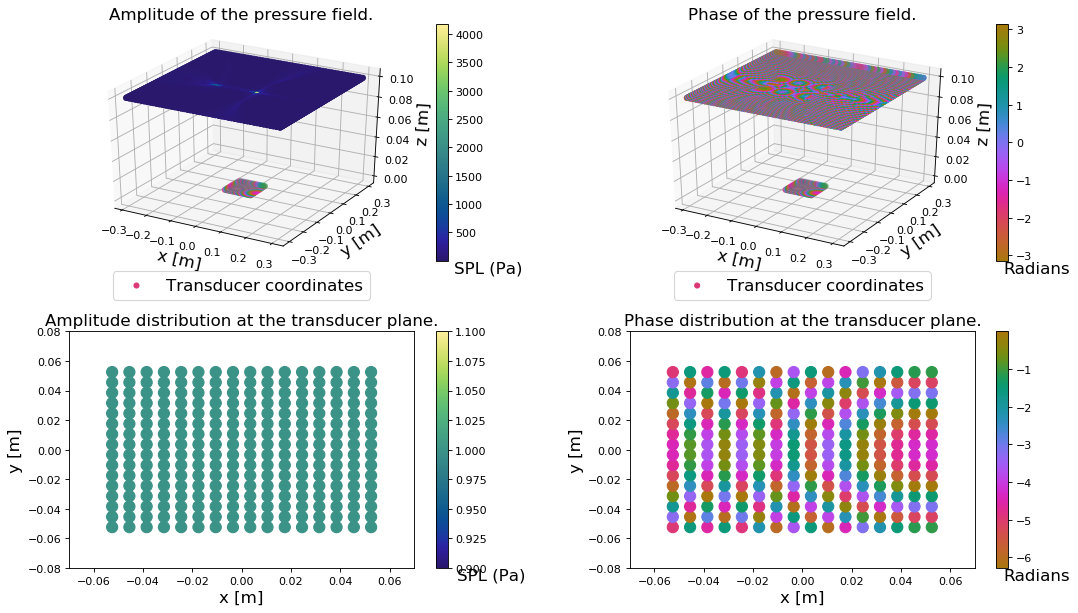

In [13]:
# Intialise the world.



# Add a transmitter array to the world.



# Initialise solver object.

solver = handybeam.solver.Solver(parent = world)

# Set grid spacing per wavelength for rectilinear sampling grid.

grid_spacing_per_wavelength = 0.2

# Set grid extent around the origin.

grid_extent_around_origin_x = 0.3
grid_extent_around_origin_y = 0.3

# Set plane height 

focal_plane_height = 100e-3

# Add a rectilinear sampling grid to the world.

rectilinear_sampler = world.add_sampler(handybeam.samplers.rectilinear_sampler.RectilinearSampler(parent = world,
                                                                               origin = np.array((0,0,focal_plane_height)),
                                                                               grid_spacing_per_wavelength = grid_spacing_per_wavelength,
                                                                               grid_extent_around_origin_x = grid_extent_around_origin_x,
                                                                               grid_extent_around_origin_y = grid_extent_around_origin_y))

# Instruct the solver to solve for the activation coefficients.

solver.single_focus_solver(x_focus = 0.05, y_focus = 0, z_focus = focal_plane_height) 

# Propagate the acoustic field

world.propagate()

# Visualise the result

rectilinear_sampler.visualise_all_in_one()
